# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv("orders.csv")

In [4]:
orders["order_value"].mean()

3145.128

In [7]:
orders.describe()

,order_id,shop_id,user_id,order_value,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [ ]:
n , bins, patches = plt.hist(orders["order_value"], 20, density=True, facecolor = '#FF00FF', alpha = 0.75)

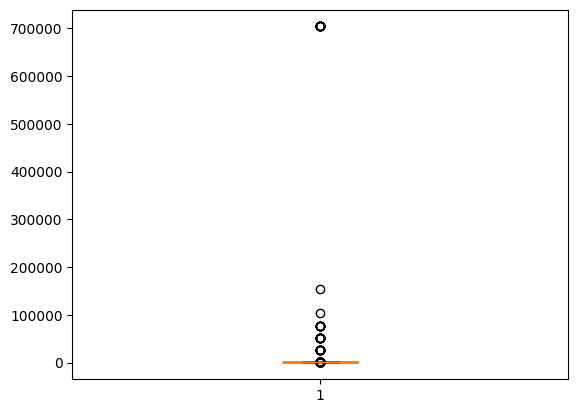

In [18]:
plt.boxplot(orders["order_value"])
plt.show()

In [85]:
orders.groupby(["shop_id"])["order_value"].mean()

235101.49019607843

It appears that there is at least one shop that has order values that are much larger than the other shops, this has resulted in a very large AOV. This analysis is flawed because it is not taking into account the sizes of each of the shops. Something that could be helpful is looking at the order value / total items to see how much is spent on average per item.

In [24]:
orders["order_value"].median()

284.0

In [23]:
orders["order_value"].mode()

0    153
Name: order_value, dtype: int64

Better metrics include the median or mode of order values because these are much less sensitive to outliers. 

The median order value is $284 and the mode order value is $153.

Another option is to calculate the median of the AOVs for each store.

In [93]:
orders.groupby(["shop_id"])["order_value"].mean().median()

308.8897584973166

In [38]:
from datetime import datetime

In [44]:
orders['DateTime'] = pd.to_datetime(orders['created_at'])

In [48]:
orders = orders.sort_values(by='DateTime')

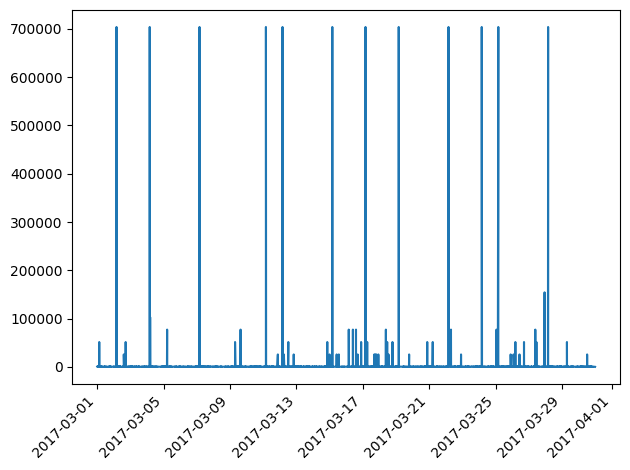

In [68]:
plt.plot(orders["DateTime"], orders["order_value"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
daily_values = orders.groupby(orders['DateTime'].dt.date)['order_value'].mean()

In [62]:
daily_values.index = pd.to_datetime(daily_values.index)

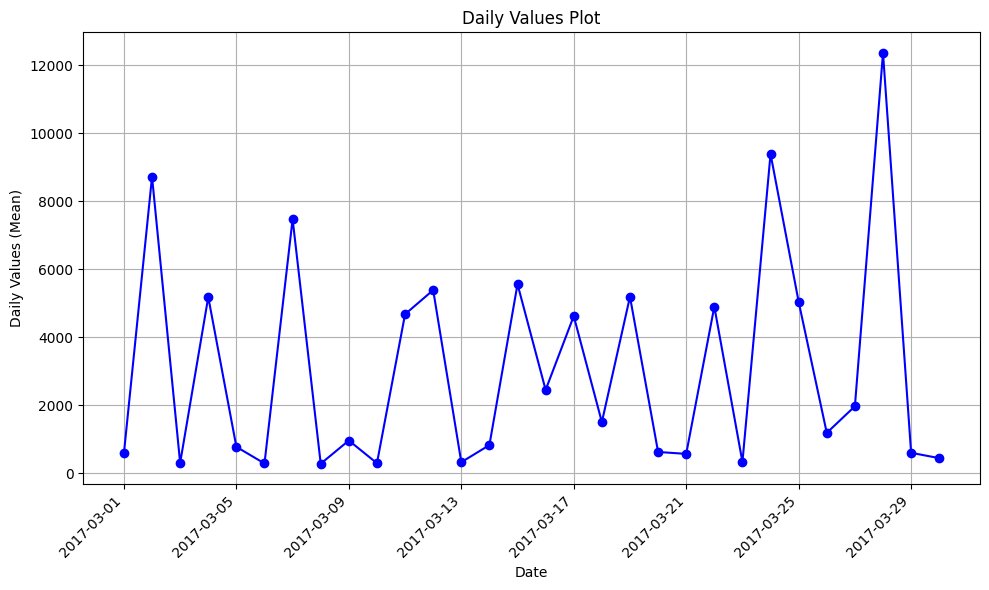

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(daily_values.index, daily_values.values, marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Daily Values (Mean)')
plt.title('Daily Values Plot')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid(True)
plt.show()

There appears to be a decrease in the average order value from the beginning of March 2017 to the middle of March, and then there is an increase in the average order value towards the end of the month. The variance in order values are also not constant, with the least variation in the middle of the month and the most towards the end of the month. 

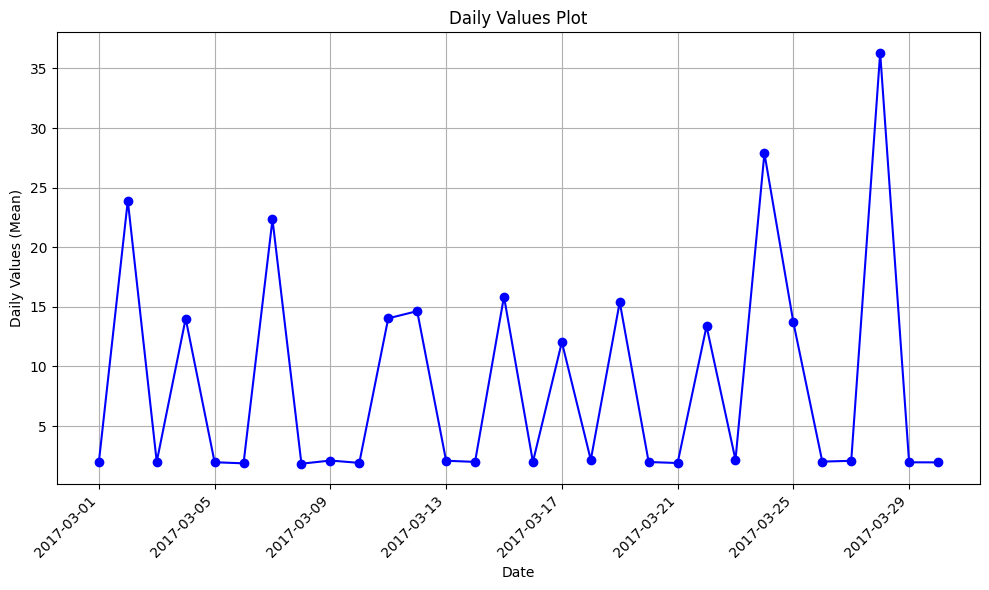

In [101]:
daily_values2 = orders.groupby(orders['DateTime'].dt.date)['total_items'].mean()
plt.figure(figsize=(10, 6))
plt.plot(daily_values2.index, daily_values2.values, marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Daily Values (Mean)')
plt.title('Daily Values Plot')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid(True)
plt.show()

There is a simililar trend with the average number of items ordered per day

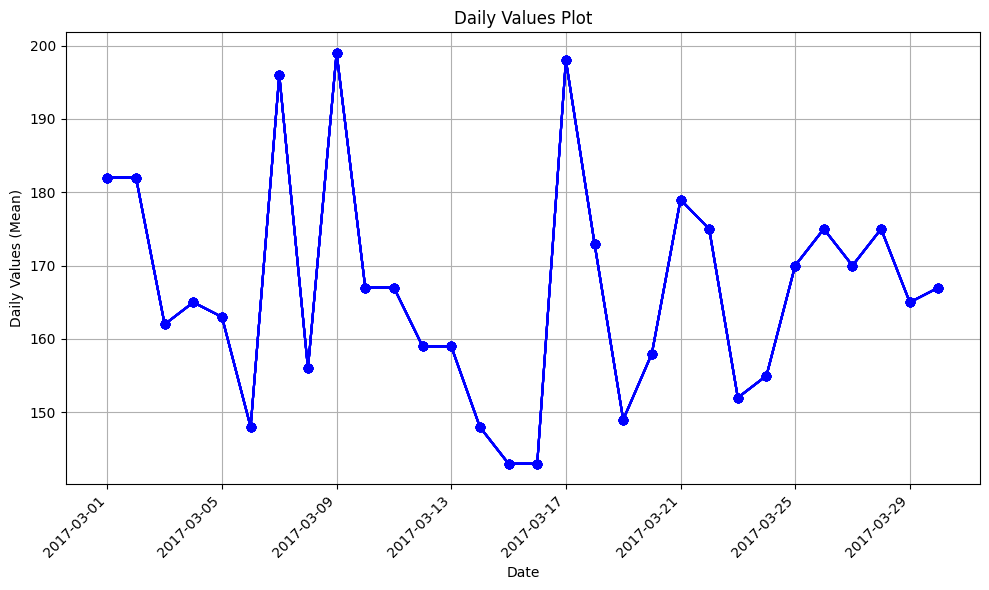

In [103]:
daily_values2 = orders.groupby(orders['DateTime'].dt.date).count()
plt.figure(figsize=(10, 6))
plt.plot(daily_values2.index, daily_values2.values, marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Daily Values (Mean)')
plt.title('Daily Values Plot')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid(True)
plt.show()

There appears to be a very different trend in the actual number of orders per day. The average number of orders appears to be relatively stable overall, however there is a period between March 13th and March 17th where there were less than 160 orders per day, which is quite low compared to the number of orders during the rest of the month. Variability in the number of orders appears to decrease towards the end of the month.